In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Synthetic Dataset Generation

---
Continous Data



In [2]:
class contValData():

  def random_seed(rseed):
    np.random.seed(rseed)

  def create(self, D, N, r=20):
    self.X = np.linspace(0,r,N).reshape(N,D)
    self.y = np.sqrt(self.X)+np.exp(-(self.X-5)**2)-2*(np.exp(-(self.X-12.5)**2)+np.random.randn(N,1)*0.2)
    return self.X, self.y

  def show(self):
    plt.figure()
    plt.scatter(self.X, self.y)

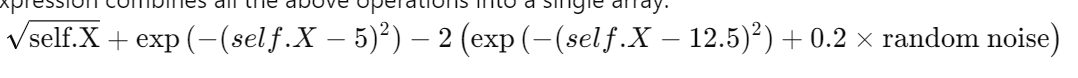

In [3]:
dat = contValData()

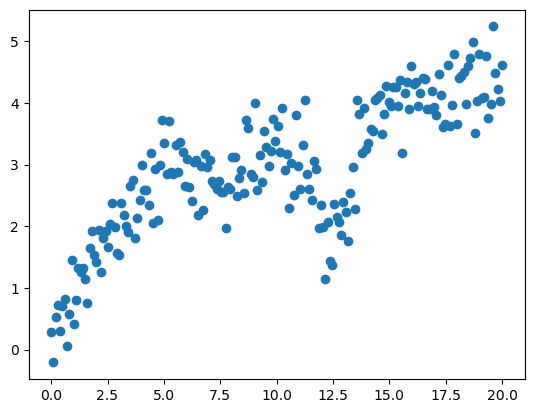

In [4]:
X,y = dat.create(1,200)
dat.show()


# Simple Linear Regression

In [5]:
class SimpleLinearReg():

  def fit(self,X,y):
    self.y=y
    self.d = np.mean(X**2) - np.mean(X)**2
    self.w1 = (np.mean(X*y) - np.mean(X)*np.mean(y))/self.d
    self.w0 = (np.mean(y)*np.mean(X**2) - np.mean(X)*np.mean(X*y))/self.d

  def predict(self,X, show=0):
    y_hat = self.w1*X + self.w0

    if show:
      plt.figure()
      plt.scatter(X,self.y, s=8)
      plt.plot(X,y_hat, color='#FE0070')

    return y_hat


In [6]:
slr = SimpleLinearReg()
slr.fit(X,y)

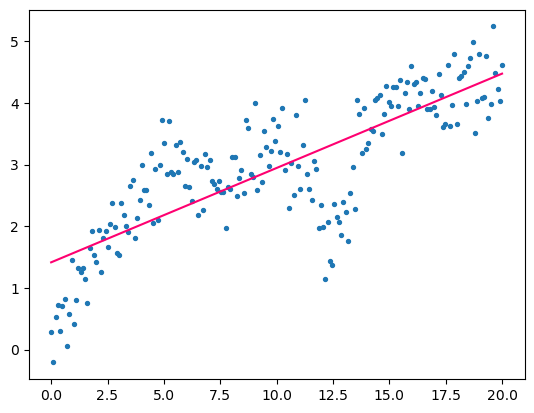

In [7]:
y_hat = slr.predict(X,show=1)

# Ordinary Least Squares Metric/ Mean squared error

In [8]:
def OLS(Y, Y_hat):
  N = Y_hat.shape[0]
  return((1/(2*N))*np.sum((Y-Y_hat)**2))

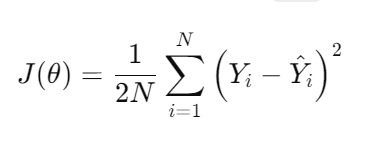

In [9]:
OLS(y,y_hat)

0.21985657861344307

In [10]:
y2 = y**2

In [11]:
slr.fit(X,y2)

In [12]:
y_hat2 = slr.predict(X)

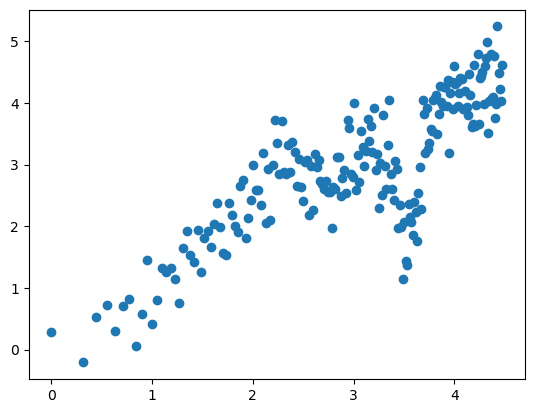

In [13]:
plt.figure()
plt.scatter(np.sqrt(X),y)

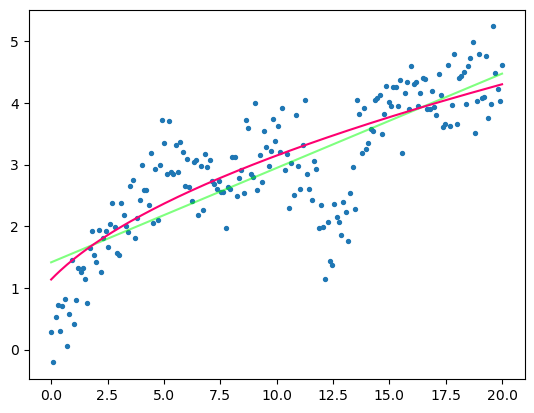

In [14]:
plt.figure()
plt.scatter(X,y, s=8)
plt.plot(X,y_hat, color = '#00FF00', alpha=0.5)
plt.plot(X,np.sqrt(y_hat2), color = '#FE0070')

# Fast Simple Linear Regression using Linalg.Solve

In [15]:
class FastSLR():
  def fit(self, X,y):
    self.W =np.linalg.solve(X.T@X, X.T@y)

  def predict(self, X):
    return np.matmul(X, self.W)

In [16]:
fslr = FastSLR()

In [17]:
fslr.fit(X,y)

In [18]:
y3_hat = fslr.predict(X)

In [19]:
OLS(y,y3_hat)

0.4724098446726794

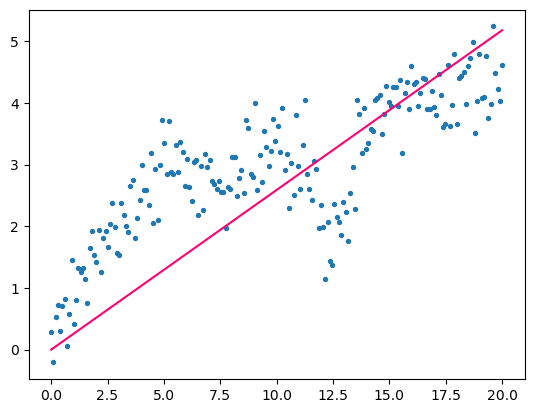

In [20]:
plt.figure()
plt.scatter(X,y, s=8)
plt.plot(X,y3_hat, color='#FE0070')

## KNN Regressor

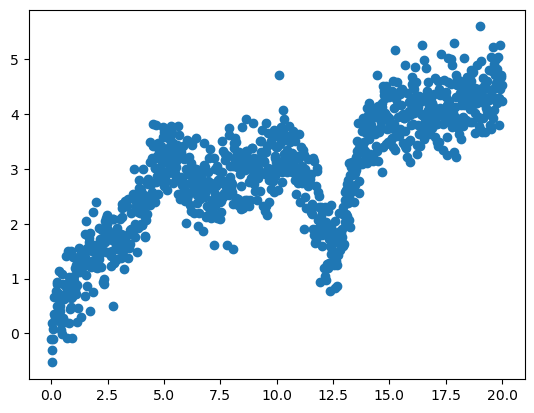

In [21]:
dat_train = contValData()
X_train, y_train = dat_train.create(1,1000)
dat_train.show()

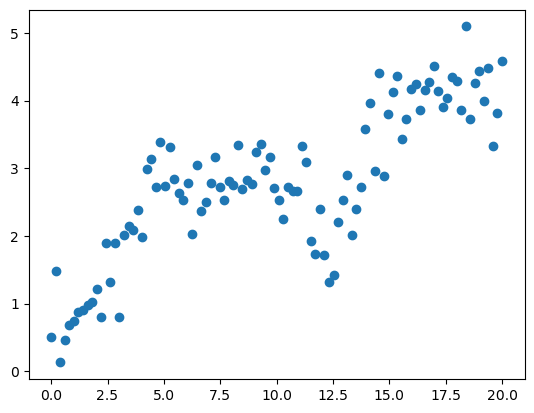

In [22]:
dat_test = contValData()
X_test, y_test = dat_test.create(1,100)
dat_test.show()

## KNN Refressor Class

In [23]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self,X,K,epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idtx =np.argsort(dist2)[:K]

      gamma_k = np.exp(-dist2[idtx])/(np.exp(-dist2[idtx]).sum()+epsilon)
      y_hat[i] = gamma_k.dot(self.y[idtx])

    return y_hat





In [24]:
knnr = KNNRegressor()
knnr.fit(X_train,y_train)

In [25]:
y_hat_train = knnr.predict(X_train,50)
y_hat_train2 = knnr.predict(X_train,8)
y_hat_train3 = knnr.predict(X_train,200)


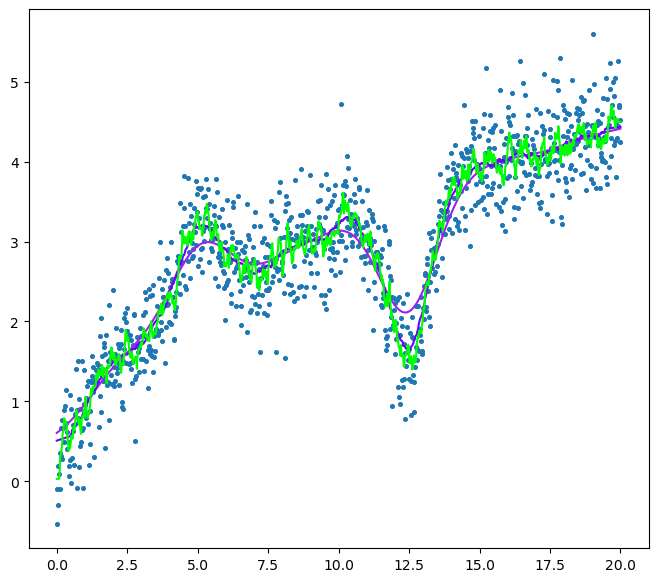

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(X_train, y_train,s=7)
plt.plot(X_train,y_hat_train3, color ="#A020F0")
plt.plot(X_train,y_hat_train, color ="#7000FF")
plt.plot(X_train,y_hat_train2, color ="#00FF00")


In [27]:
y_hat_test = knnr.predict(X_test,50)

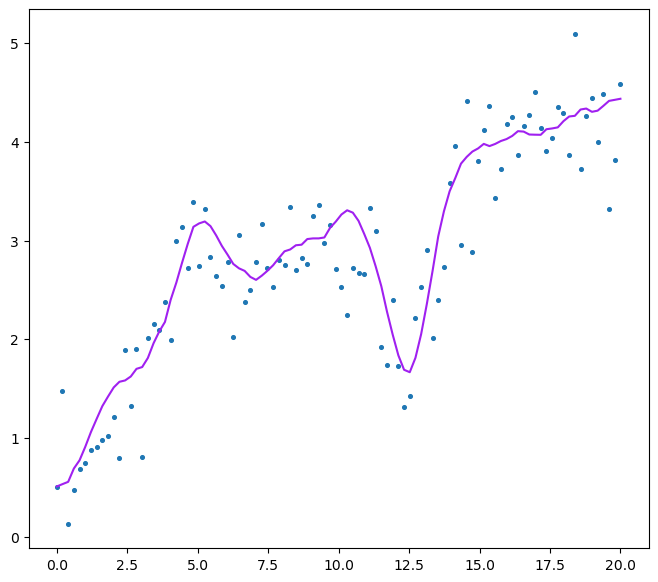

In [28]:
plt.figure(figsize=(8,7))
plt.scatter(X_test, y_test,s=7)
plt.plot(X_test,y_hat_test, color ="#A020F0")

MAPE = 100 × (1/n) × Σ|((actual - predicted) / abs(actual))|

In [29]:
def MAPE(Y,Y_hat):
  return np.mean(np.abs((Y - Y_hat) / np.abs(Y))) * 100


In [30]:
def R2(Y,Y_hat):
  N=len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum(Y_hat-np.mean(Y)**2)))

In [31]:
MAPE(y_test,y_hat_test)

87.39753131153684

In [32]:
R2(y_test,y_hat_test)

49.380309267508714

In [33]:
def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [34]:
OLS(y_test,y_hat_test,len(y_test))

117.74627370391819

# OLS Regressor with Gradient Descent

In [35]:
class MVLinearRegression():

  def fit(self, X, y, eta = 1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape
    Y=y

    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stostachistic Gradient Descent
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch]= OLS(Y, Y_hat, N)
      #Weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W



# Kansas City House Example

In [36]:
data = pd.read_csv('kc_house_data.csv')

In [37]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [39]:
X= data[['price','bedrooms', 'bathrooms','condition','sqft_living']].copy().to_numpy()

In [40]:
X

array([[2.21900e+05, 3.00000e+00, 1.00000e+00, 3.00000e+00, 1.18000e+03],
       [5.38000e+05, 3.00000e+00, 2.25000e+00, 3.00000e+00, 2.57000e+03],
       [1.80000e+05, 2.00000e+00, 1.00000e+00, 3.00000e+00, 7.70000e+02],
       ...,
       [4.02101e+05, 2.00000e+00, 7.50000e-01, 3.00000e+00, 1.02000e+03],
       [4.00000e+05, 3.00000e+00, 2.50000e+00, 3.00000e+00, 1.60000e+03],
       [3.25000e+05, 2.00000e+00, 7.50000e-01, 3.00000e+00, 1.02000e+03]])

In [41]:
y = X[:,0]
X=X[:,1:]

In [46]:
X

array([[3.00e+00, 1.00e+00, 3.00e+00, 1.18e+03],
       [3.00e+00, 2.25e+00, 3.00e+00, 2.57e+03],
       [2.00e+00, 1.00e+00, 3.00e+00, 7.70e+02],
       ...,
       [2.00e+00, 7.50e-01, 3.00e+00, 1.02e+03],
       [3.00e+00, 2.50e+00, 3.00e+00, 1.60e+03],
       [2.00e+00, 7.50e-01, 3.00e+00, 1.02e+03]])

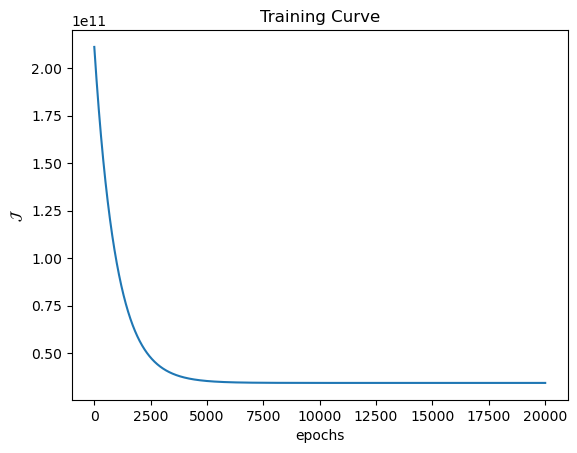

In [42]:
my_reg = MVLinearRegression()
my_reg.fit(X,y,eta=1e-10,epochs=2e4,show_curve=True)

In [43]:
Xtest=np.array([[3,2,3,2500]])

In [44]:
my_reg.predict(Xtest)

array([657701.58611952])